# wetterdienst - A basic notebook example

In [1]:
#!pip install wetterdienst

## Import modules necessary for general functioning

In [2]:
from pprint import pprint

from wetterdienst import Settings
from wetterdienst.provider.dwd.observation import (
    DwdObservationRequest,
    DwdObservationPeriod,
    DwdObservationResolution,
    DwdObservationParameter,
    DwdObservationDataset,
)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import polars as pl

In [3]:
%matplotlib inline

Wetterdienst default settings

In [4]:
# don't display real cache_dir, which might contain sensible information
s = Settings.default().to_dict()
s.update({"cache_dir": "abc"})
s

{'cache_disable': False,
 'cache_dir': 'abc',
 'fsspec_client_kwargs': {},
 'ts_humanize': True,
 'ts_shape': 'long',
 'ts_si_units': True,
 'ts_skip_empty': False,
 'ts_skip_threshold': 0.95,
 'ts_skip_criteria': 'min',
 'ts_dropna': False,
 'ts_interpolation_use_nearby_station_distance': 1}

## Which parameters are available?

All available parameters

In [5]:
pprint(DwdObservationRequest.discover())

{'annual': {'cloud_cover_total': {'origin': '1/8', 'si': 'pct'},
            'count_weather_type_dew': {'origin': '-', 'si': '-'},
            'count_weather_type_fog': {'origin': '-', 'si': '-'},
            'count_weather_type_glaze': {'origin': '-', 'si': '-'},
            'count_weather_type_hail': {'origin': '-', 'si': '-'},
            'count_weather_type_sleet': {'origin': '-', 'si': '-'},
            'count_weather_type_storm_stormier_wind': {'origin': '-',
                                                       'si': '-'},
            'count_weather_type_storm_strong_wind': {'origin': '-', 'si': '-'},
            'count_weather_type_thunder': {'origin': '-', 'si': '-'},
            'precipitation_height': {'origin': 'mm', 'si': 'kg / m ** 2'},
            'precipitation_height_max': {'origin': 'mm', 'si': 'kg / m ** 2'},
            'snow_depth': {'origin': 'cm', 'si': 'm'},
            'snow_depth_new': {'origin': 'cm', 'si': 'm'},
            'sunshine_duration': {'origin': '

Selection of daily data

In [6]:
pprint(DwdObservationRequest.discover(resolution=DwdObservationResolution.DAILY))

{'daily': {'cloud_cover_total': {'origin': '1/8', 'si': 'pct'},
           'count_weather_type_dew': {'origin': '-', 'si': '-'},
           'count_weather_type_fog': {'origin': '-', 'si': '-'},
           'count_weather_type_glaze': {'origin': '-', 'si': '-'},
           'count_weather_type_hail': {'origin': '-', 'si': '-'},
           'count_weather_type_ripe': {'origin': '-', 'si': '-'},
           'count_weather_type_sleet': {'origin': '-', 'si': '-'},
           'count_weather_type_storm_stormier_wind': {'origin': '-', 'si': '-'},
           'count_weather_type_storm_strong_wind': {'origin': '-', 'si': '-'},
           'count_weather_type_thunder': {'origin': '-', 'si': '-'},
           'humidity': {'origin': 'pct', 'si': 'pct'},
           'precipitation_form': {'origin': '-', 'si': '-'},
           'precipitation_height': {'origin': 'mm', 'si': 'kg / m ** 2'},
           'pressure_air_site': {'origin': 'hPa', 'si': 'Pa'},
           'pressure_vapor': {'origin': 'hPa', 'si': 'Pa'}

## List of historical daily precipitation stations of DWD (Germany)

In [7]:
request = DwdObservationRequest(
    parameter=DwdObservationDataset.PRECIPITATION_MORE,
    resolution=DwdObservationResolution.DAILY,
    period=DwdObservationPeriod.HISTORICAL,
).all()
request.df.head()

station_id,from_date,to_date,height,latitude,longitude,name,state
str,datetime[μs],datetime[μs],f64,f64,f64,str,str
"""00001""",1912-01-01 00:00:00,1986-06-30 00:00:00,478.0,47.8413,8.8493,"""Aach""","""Baden-Württemb…"
"""00002""",1951-01-01 00:00:00,2006-12-31 00:00:00,138.0,50.8066,6.0996,"""Aachen (Kläran…","""Nordrhein-West…"
"""00003""",1891-01-01 00:00:00,2011-03-31 00:00:00,202.0,50.7827,6.0941,"""Aachen""","""Nordrhein-West…"
"""00004""",1951-01-01 00:00:00,1979-10-31 00:00:00,243.0,50.7683,6.1207,"""Aachen-Brand""","""Nordrhein-West…"
"""00006""",1982-11-01 00:00:00,2023-04-09 00:00:00,455.0,48.8361,10.0598,"""Aalen-Unterrom…","""Baden-Württemb…"


Number of stations with available data

In [8]:
request.df.shape

(5730, 8)

## Map of historical daily precipitation stations of DWD (Germany)

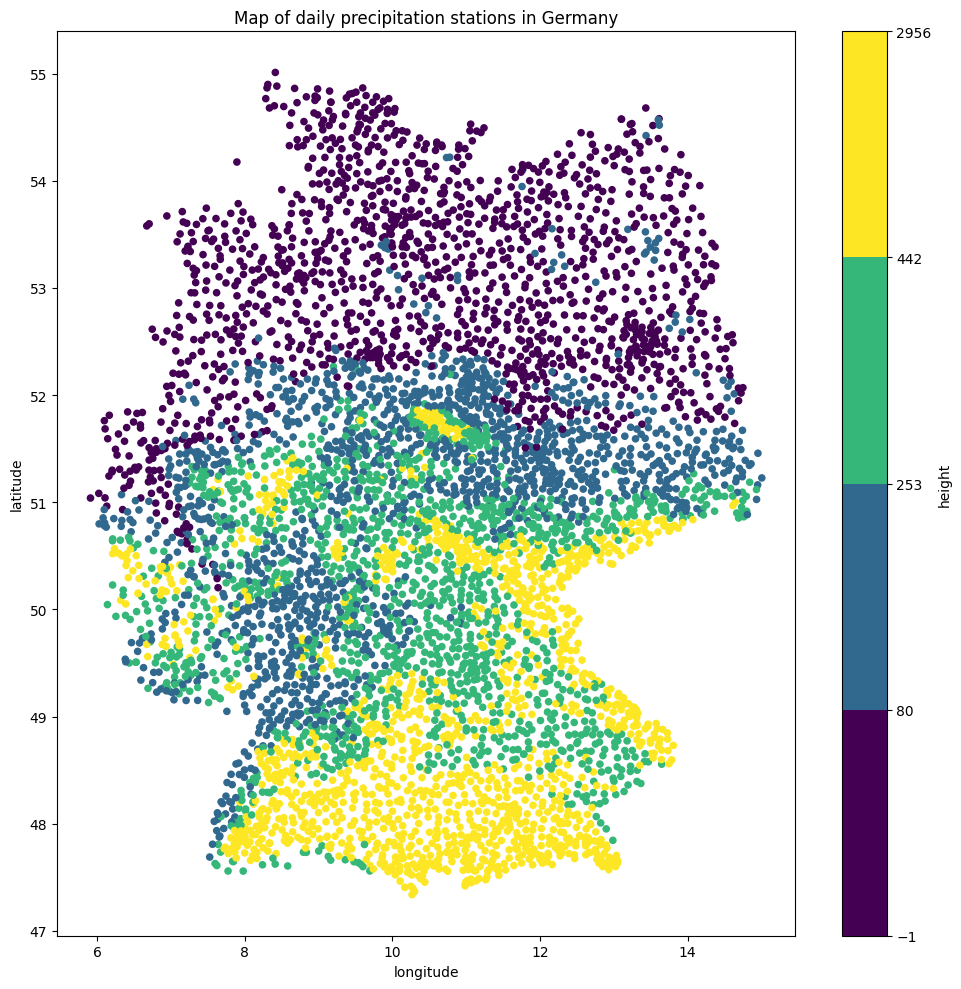

In [9]:
cmap = colormaps.get_cmap("viridis")
bounds = np.quantile(request.df.get_column("height"), [0, 0.25, 0.5, 0.75, 1])
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(figsize=(10, 10), tight_layout=True)
plot = request.df.to_pandas().plot.scatter(x="longitude", y="latitude", c="height", cmap=cmap, norm=norm, ax=ax)
title = "Map of daily precipitation stations in Germany"
plot.set_title(title)
plt.show()

## Get data for daily precipitation station - Dresden Klotzsche (1048)

In [10]:
values = (
    DwdObservationRequest(
        parameter=DwdObservationDataset.PRECIPITATION_MORE,
        resolution=DwdObservationResolution.DAILY,
        period=DwdObservationPeriod.HISTORICAL,
    )
    .filter_by_station_id(station_id=[1048])
    .values.all()
    .df
)
values.drop_nulls().head()

station_id,dataset,parameter,date,value,quality
str,str,str,"datetime[μs, UTC]",f64,f64
"""01048""","""precipitation_…","""precipitation_…",1926-04-25 00:00:00 UTC,0.0,1.0
"""01048""","""precipitation_…","""precipitation_…",1926-04-26 00:00:00 UTC,0.0,1.0
"""01048""","""precipitation_…","""precipitation_…",1926-04-27 00:00:00 UTC,0.0,1.0
"""01048""","""precipitation_…","""precipitation_…",1926-04-28 00:00:00 UTC,0.0,1.0
"""01048""","""precipitation_…","""precipitation_…",1926-04-29 00:00:00 UTC,0.0,1.0


## Get data for daily precipitation and temperature (tmin, tmean, tmax) for station - Dresden Klotzsche (1048)

In [11]:
parameters = [
    DwdObservationParameter.DAILY.TEMPERATURE_AIR_MEAN_200,
    DwdObservationParameter.DAILY.TEMPERATURE_AIR_MAX_200,
    DwdObservationParameter.DAILY.TEMPERATURE_AIR_MIN_200,
    DwdObservationParameter.DAILY.PRECIPITATION_HEIGHT,
]
values = (
    DwdObservationRequest(
        parameter=parameters, resolution=DwdObservationResolution.DAILY, period=DwdObservationPeriod.HISTORICAL
    )
    .filter_by_station_id(station_id=(1048,))
    .values.all()
)
values.df.drop_nulls().head()

station_id,dataset,parameter,date,value,quality
str,str,str,"datetime[μs, UTC]",f64,f64
"""01048""","""climate_summar…","""temperature_ai…",1934-01-01 00:00:00 UTC,273.65,1.0
"""01048""","""climate_summar…","""temperature_ai…",1934-01-02 00:00:00 UTC,273.05,1.0
"""01048""","""climate_summar…","""temperature_ai…",1934-01-03 00:00:00 UTC,272.45,1.0
"""01048""","""climate_summar…","""temperature_ai…",1934-01-04 00:00:00 UTC,271.55,1.0
"""01048""","""climate_summar…","""temperature_ai…",1934-01-05 00:00:00 UTC,274.05,1.0


## Aggregate to annual values

In [12]:
def _agg_custom(group_series):
    if group_series.name == "precipitation_height":
        return group_series.drop_nulls().resample("1Y").sum(min_count=360)
    else:
        return group_series.drop_nulls().resample("1Y").mean()


data = []
for (parameter,), group in values.df.groupby([pl.col("parameter")], maintain_order=True):
    if parameter == "precipitation_height":
        agg_df = group.groupby(pl.col("date").dt.year(), maintain_order=True).agg(
            pl.when(pl.col("value").is_not_null().sum() > 360).then(pl.col("value").sum())
        )
    else:
        agg_df = group.groupby(pl.col("date").dt.year(), maintain_order=True).agg([pl.col("value").mean()])
    agg_df = agg_df.select(
        pl.lit(parameter).alias("parameter"),
        pl.col("date").cast(pl.Utf8).str.strptime(datatype=pl.Datetime, fmt="%Y"),
        pl.col("value"),
    )
    data.append(agg_df)
df_annual = pl.concat(data)
df_annual

parameter,date,value
str,datetime[μs],f64
"""temperature_ai…",1934-01-01 00:00:00,283.795479
"""temperature_ai…",1935-01-01 00:00:00,282.203425
"""temperature_ai…",1936-01-01 00:00:00,281.951366
"""temperature_ai…",1937-01-01 00:00:00,282.10726
"""temperature_ai…",1938-01-01 00:00:00,282.171096
"""temperature_ai…",1939-01-01 00:00:00,281.69137
"""temperature_ai…",1940-01-01 00:00:00,279.776776
"""temperature_ai…",1941-01-01 00:00:00,280.450822
"""temperature_ai…",1942-01-01 00:00:00,280.782055


## Create some plots for the data

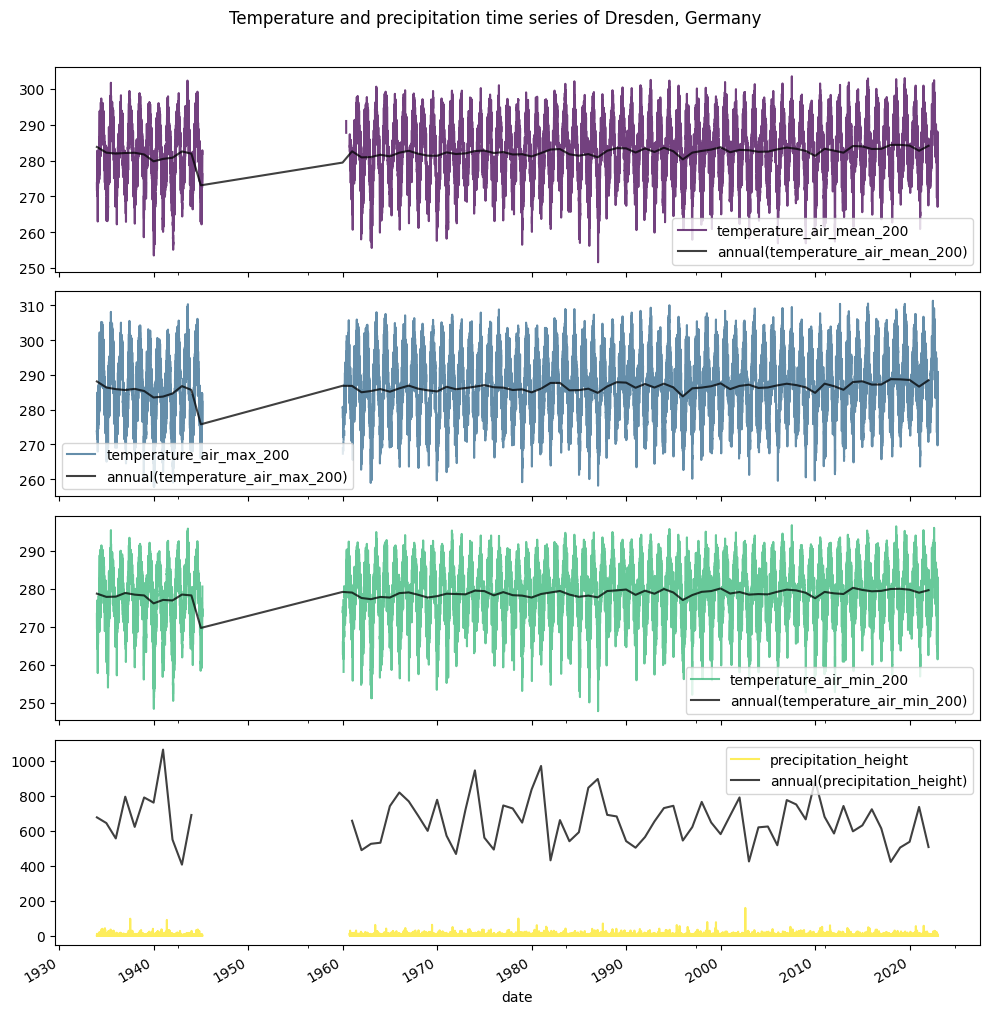

In [13]:
cmap = plt.get_cmap("viridis", 4)
colors = cmap.colors
fig, axes = plt.subplots(nrows=len(parameters), tight_layout=True, sharex=True, figsize=(10, 10))  #
for (parameter, daily), (_, annual), ax, color in zip(
    values.df.groupby("parameter", maintain_order=True),
    df_annual.groupby("parameter", maintain_order=True),
    axes,
    colors,
):
    daily.to_pandas().plot(x="date", y="value", label=parameter, alpha=0.75, ax=ax, c=color)
    annual.to_pandas().plot(
        x="date", y="value", kind="line", label=f"annual({parameter})", alpha=0.75, ax=ax, c="black"
    )
plt.suptitle("Temperature and precipitation time series of Dresden, Germany", y=1.01)
plt.show()

## Find a station

In [14]:
request = DwdObservationRequest(
    parameter=DwdObservationParameter.DAILY.CLIMATE_SUMMARY.TEMPERATURE_AIR_MEAN_200,
    resolution=DwdObservationResolution.DAILY,
    period=DwdObservationPeriod.HISTORICAL,
    start_date="1930-01-01",
    end_date="1970-01-01",
)

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>]


In [15]:
request.filter_by_rank((51.05089, 13.73832), 5).df

station_id,from_date,to_date,height,latitude,longitude,name,state,distance
str,datetime[μs],datetime[μs],f64,f64,f64,str,str,f64
"""01047""",1828-01-01 00:00:00,1915-12-31 00:00:00,112.0,51.0557,13.7274,"""Dresden (Mitte…","""Sachsen""",0.932013
"""01051""",1936-01-01 00:00:00,2023-04-09 00:00:00,119.0,51.0249,13.7751,"""Dresden-Strehl…","""Sachsen""",3.868499
"""01050""",1949-01-01 00:00:00,2023-04-09 00:00:00,112.0,51.0221,13.847,"""Dresden-Hoster…","""Sachsen""",8.245925
"""01048""",1934-01-01 00:00:00,2023-04-09 00:00:00,228.0,51.1278,13.7543,"""Dresden-Klotzs…","""Sachsen""",8.624522
"""05282""",1917-01-01 00:00:00,1974-06-30 00:00:00,246.0,51.1197,13.6744,"""Wahnsdorf bei …","""Sachsen""",8.858692
"""00991""",1954-09-01 00:00:00,2023-04-09 00:00:00,359.0,50.9116,13.7087,"""Dippoldiswalde…","""Sachsen""",15.626528
"""06095""",1998-05-01 00:00:00,1999-09-30 00:00:00,273.0,51.0838,13.4486,"""Taubenheim-See…","""Sachsen""",20.572434
"""03234""",1956-06-01 00:00:00,2023-04-09 00:00:00,158.0,51.1294,13.4328,"""Klipphausen-Ga…","""Sachsen""",23.054619
"""01709""",1952-01-01 00:00:00,1990-12-31 00:00:00,360.0,50.8496,13.9392,"""Gottleuba""","""""",26.438526


In [16]:
request.filter_by_distance((51.05089, 13.73832), 20).df

station_id,from_date,to_date,height,latitude,longitude,name,state,distance
str,datetime[μs],datetime[μs],f64,f64,f64,str,str,f64
"""01047""",1828-01-01 00:00:00,1915-12-31 00:00:00,112.0,51.0557,13.7274,"""Dresden (Mitte…","""Sachsen""",0.932013
"""01051""",1936-01-01 00:00:00,2023-04-09 00:00:00,119.0,51.0249,13.7751,"""Dresden-Strehl…","""Sachsen""",3.868499
"""01050""",1949-01-01 00:00:00,2023-04-09 00:00:00,112.0,51.0221,13.847,"""Dresden-Hoster…","""Sachsen""",8.245925
"""01048""",1934-01-01 00:00:00,2023-04-09 00:00:00,228.0,51.1278,13.7543,"""Dresden-Klotzs…","""Sachsen""",8.624522
"""05282""",1917-01-01 00:00:00,1974-06-30 00:00:00,246.0,51.1197,13.6744,"""Wahnsdorf bei …","""Sachsen""",8.858692
"""00991""",1954-09-01 00:00:00,2023-04-09 00:00:00,359.0,50.9116,13.7087,"""Dippoldiswalde…","""Sachsen""",15.626528


In [17]:
request.filter_by_station_id("1048").df

station_id,from_date,to_date,height,latitude,longitude,name,state
str,datetime[μs],datetime[μs],f64,f64,f64,str,str
"""01048""",1934-01-01 00:00:00,2023-04-09 00:00:00,228.0,51.1278,13.7543,"""Dresden-Klotzs…","""Sachsen"""


In [18]:
request.filter_by_name("Dresden Klo", threshold=70).df

station_id,from_date,to_date,height,latitude,longitude,name,state
str,datetime[μs],datetime[μs],f64,f64,f64,str,str
"""01047""",1828-01-01 00:00:00,1915-12-31 00:00:00,112.0,51.0557,13.7274,"""Dresden (Mitte…","""Sachsen"""
"""01048""",1934-01-01 00:00:00,2023-04-09 00:00:00,228.0,51.1278,13.7543,"""Dresden-Klotzs…","""Sachsen"""
"""01050""",1949-01-01 00:00:00,2023-04-09 00:00:00,112.0,51.0221,13.847,"""Dresden-Hoster…","""Sachsen"""
"""01051""",1936-01-01 00:00:00,2023-04-09 00:00:00,119.0,51.0249,13.7751,"""Dresden-Strehl…","""Sachsen"""
"""05282""",1917-01-01 00:00:00,1974-06-30 00:00:00,246.0,51.1197,13.6744,"""Wahnsdorf bei …","""Sachsen"""


In [19]:
request.filter_by_sql("SELECT * FROM df WHERE name LIKE 'Dresden%' AND ABS(height - 200) < 30").df

station_id,from_date,to_date,height,latitude,longitude,name,state
str,"datetime[ns, Europe/Berlin]","datetime[ns, Europe/Berlin]",f64,f64,f64,str,str
"""01048""",1934-01-01 00:00:00 CET,2023-04-09 00:00:00 CEST,228.0,51.1278,13.7543,"""Dresden-Klotzs…","""Sachsen"""


In [20]:
request.filter_by_bbox(left=13.74, bottom=51.126, right=13.755, top=51.13).df

station_id,from_date,to_date,height,latitude,longitude,name,state
str,datetime[μs],datetime[μs],f64,f64,f64,str,str
"""01048""",1934-01-01 00:00:00,2023-04-09 00:00:00,228.0,51.1278,13.7543,"""Dresden-Klotzs…","""Sachsen"""


## Summarize values
Fill up values from nearby stations

In [21]:
request.summarize((51.05089, 13.73832)).df

date,parameter,value,distance,station_id
"datetime[μs, UTC]",str,f64,f64,str
1930-01-01 00:00:00 UTC,"""temperature_ai…",275.75,8.86,"""05282"""
1930-01-02 00:00:00 UTC,"""temperature_ai…",278.25,8.86,"""05282"""
1930-01-03 00:00:00 UTC,"""temperature_ai…",279.35,8.86,"""05282"""
1930-01-04 00:00:00 UTC,"""temperature_ai…",279.25,8.86,"""05282"""
1930-01-05 00:00:00 UTC,"""temperature_ai…",273.65,8.86,"""05282"""
1930-01-06 00:00:00 UTC,"""temperature_ai…",274.45,8.86,"""05282"""
1930-01-07 00:00:00 UTC,"""temperature_ai…",273.45,8.86,"""05282"""
1930-01-08 00:00:00 UTC,"""temperature_ai…",272.55,8.86,"""05282"""
1930-01-09 00:00:00 UTC,"""temperature_ai…",273.05,8.86,"""05282"""


## Interpolate values

In [22]:
request.interpolate((51.05089, 13.73832)).df

date,parameter,value,distance_mean,station_ids
"datetime[μs, UTC]",str,f64,f64,list[str]
1930-01-01 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-02 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-03 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-04 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-05 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-06 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-07 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-08 00:00:00 UTC,"""temperature_ai…",null,null,[]
1930-01-09 00:00:00 UTC,"""temperature_ai…",null,null,[]
